In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from sklearn.cluster import KMeans
from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Read data

In [2]:
abundance_clean = pd.read_csv('data/MetaCardis2020_relative_abundance.csv', index_col=0).T
abundance_clean.head()

taxa,Bacteroides uniformis,Phocaeicola dorei,Alistipes finegoldii,Phocaeicola vulgatus,Eubacterium sp. CAG:180,[Eubacterium] siraeum,Ruminococcus bromii,Faecalibacterium prausnitzii,Alistipes inops,Bacteroides caccae,...,Selenomonas sp. oral taxon 920,Prevotella dentalis,Dysgonomonas sp. 37-18,Criibacterium bergeronii,Sneathia vaginalis,Mageeibacillus indolicus,Dialister micraerophilus,Tissierellia bacterium KA00581,Anaerococcus lactolyticus,Actinomyces naeslundii
M0x10MCx1134,18.68909,10.88477,8.14016,7.69579,5.24825,5.07696,5.02719,4.30983,4.13960,3.87180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M0x10MCx1135,0.47634,0.12509,0.11658,0.06780,5.09389,0.04229,0.00000,5.53411,0.00000,0.50499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M0x10MCx1138,1.69175,19.99088,0.31639,1.37651,0.00000,0.00000,0.00000,2.18830,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M0x10MCx1140,8.54740,8.29615,0.00000,2.42549,0.00000,1.19415,0.00000,8.54110,10.29545,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M0x10MCx1143,11.01829,28.54958,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.20877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
sample_metadata = pd.read_csv('data/MetaCardis2020_sample_metadata.csv', index_col=0)
sample_metadata.head()



,study_name,subject_id,body_site,antibiotics_current_use,study_condition,disease,age_category,gender,country,non_westernized,...,BMI,treatment,location,disease_subtype,triglycerides,hba1c,smoke,bristol_score,hsCRP,LDL
M0x10MCx1134,MetaCardis_2020_a,M0x10MCx1134,stool,no,IGT,IGT;MS,adult,female,FRA,no,...,44.365888,antihta;thiazidique;at2_inhib,Paris,NaN,97.940706,6.0,no,1.0,1.3,140.673726
M0x10MCx1135,MetaCardis_2020_a,M0x10MCx1135,stool,no,T2D,T2D,adult,male,FRA,no,...,27.719670,antidiab;su;metformin;dppiv;insulin,Paris,NaN,NaN,NaN,no,NaN,NaN,NaN
M0x10MCx1138,MetaCardis_2020_a,M0x10MCx1138,stool,yes,T2D,T2D,adult,male,FRA,no,...,38.221055,antidiab;su;metformin,Paris,NaN,NaN,NaN,1.0,NaN,NaN,NaN
M0x10MCx1140,MetaCardis_2020_a,M0x10MCx1140,stool,NaN,control,MS,adult,female,FRA,no,...,36.283006,antihta;thiazidique;at2_inhib;ca2_cbl,Paris,NaN,NaN,NaN,no,NaN,NaN,NaN
M0x10MCx1143,MetaCardis_2020_a,M0x10MCx1143,stool,yes,T2D,T2D,senior,female,FRA,no,...,39.817729,antihta;antidiab;thiazidique;at2_inhib;metformin,Paris,NaN,NaN,NaN,no,NaN,NaN,NaN


In [4]:
taxa_meta = pd.read_csv('data/MetaCardis2020_taxa_metadata.csv', index_col=0)
taxa_meta.head()

,superkingdom,phylum,class,order,family,genus,species
Bacteroides uniformis,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides uniformis
Phocaeicola dorei,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,Phocaeicola dorei
Alistipes finegoldii,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,Alistipes finegoldii
Phocaeicola vulgatus,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,Phocaeicola vulgatus
Eubacterium sp. CAG:180,Bacteria,Firmicutes,Clostridia,Eubacteriales,Eubacteriaceae,Eubacterium,Eubacterium sp. CAG:180


# Species Exploration

## Check the abundance of the bacteria based on condition and antibiotic use

In [5]:
counts_df = pd.merge(sample_metadata, abundance_clean, right_index=True, left_index=True)
counts_df.value_counts(['antibiotics_current_use','study_condition'])

antibiotics_current_use  study_condition
no                       control            319
                         T2D                306
yes                      control            297
                         T2D                209
no                       CAD                163
yes                      IGT                138
no                       IGT                113
yes                      CAD                 89
                         HF                  50
no                       HF                  43
Name: count, dtype: int64

In [6]:
counts_df['antibiotics_current_use'].value_counts()


antibiotics_current_use
no     944
yes    783
Name: count, dtype: int64

In [7]:
counts_df['study_condition'].value_counts()

study_condition
control    642
T2D        550
IGT        275
CAD        269
HF          95
Name: count, dtype: int64

#### Scatter Plot

## Mann–Whitney U test

In [8]:
def test_diff_abundance(df, group_col, species):
    group1 = df[df[group_col] == 'Yes'][species]
    group2 = df[df[group_col] == 'No'][species]
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    return p

In [9]:
results = pd.DataFrame({
    'species': abundance_clean.columns,
    'p_value': [test_diff_abundance(counts_df, 'antibiotics_current_use', sp) for sp in abundance_clean.columns]
})
results['p_adj'] = results['p_value'] * len(results)  # Bonferroni correction
results.sort_values('p_adj')

/var/folders/mh/p8rsw7z90bv6kv8r8qnf4tnr0000gn/T/ipykernel_14604/3143544168.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(group1, group2, alternative='two-sided')


,species,p_value,p_adj
0,Bacteroides uniformis,NaN,NaN
1,Phocaeicola dorei,NaN,NaN
2,Alistipes finegoldii,NaN,NaN
3,Phocaeicola vulgatus,NaN,NaN
4,Eubacterium sp. CAG:180,NaN,NaN
...,...,...,...
692,Mageeibacillus indolicus,NaN,NaN
693,Dialister micraerophilus,NaN,NaN
694,Tissierellia bacterium KA00581,NaN,NaN
695,Anaerococcus lactolyticus,NaN,NaN


In [10]:
df = counts_df.dropna(subset=['antibiotics_current_use']).copy()

# unique groups
groups = df['antibiotics_current_use'].unique()
print("Groups:", groups)

# must have 2 groups
if len(groups) != 2:
    raise ValueError(f"Expected 2 groups, got {len(groups)}: {groups}")

group1, group2 = groups


Groups: ['no' 'yes']


In [11]:
results = []

# Iterate through each bacterial species column
for species in abundance_clean.columns:
    vals1 = df[df['antibiotics_current_use'] == group1][species]
    vals2 = df[df['antibiotics_current_use'] == group2][species]

    # Mann–Whitney U test
    stat, pval = mannwhitneyu(vals1, vals2, alternative='two-sided')

    # Compute effect size (optional)
    n1, n2 = len(vals1), len(vals2)
    z = (stat - (n1 * n2 / 2)) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    effect_size = abs(z) / np.sqrt(n1 + n2)

    results.append({
        'species': species,
        'p_value': pval,
        'effect_size': effect_size
    })

results_df = pd.DataFrame(results)

# Apply Benjamini-Hochberg (FDR) correction for multiple testing
results_df = results_df.sort_values('p_value')
m = len(results_df)
results_df['p_adj'] = results_df['p_value'] * m / (np.arange(1, m + 1))
results_df['p_adj'] = results_df['p_adj'].clip(upper=1)

results_df

,species,p_value,effect_size,p_adj
147,[Ruminococcus] gnavus,3.045430e-13,0.153264,2.122665e-10
31,Flavonifractor plautii,8.080530e-13,0.171921,2.816065e-10
225,Coprococcus eutactus,1.854211e-11,0.136059,4.307950e-09
41,Firmicutes bacterium CAG:110,2.433791e-11,0.148834,4.240881e-09
76,Firmicutes bacterium CAG:95,7.486746e-11,0.134463,1.043652e-08
...,...,...,...,...
550,Peptoniphilus duerdenii,1.000000e+00,0.000000,1.000000e+00
517,Leptotrichia wadei,1.000000e+00,0.000000,1.000000e+00
585,Fusobacterium naviforme,1.000000e+00,0.000000,1.000000e+00
308,Prevotella sp. S7-1-8,1.000000e+00,0.000000,1.000000e+00


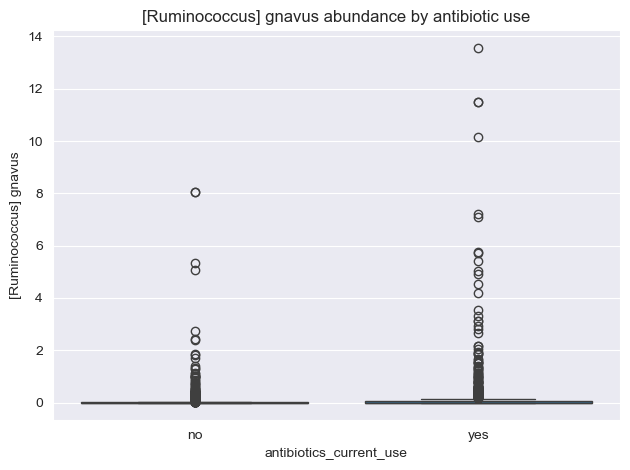

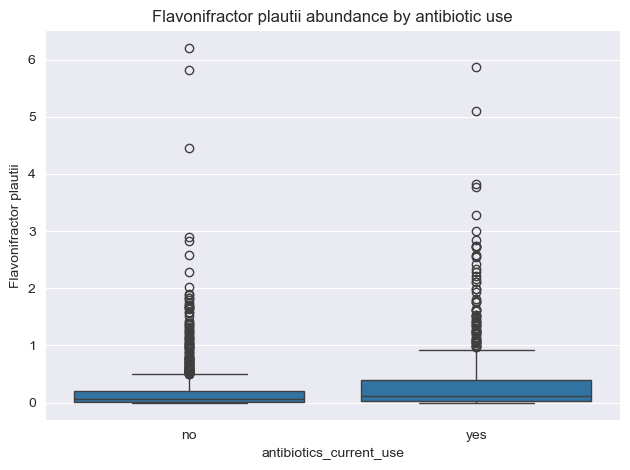

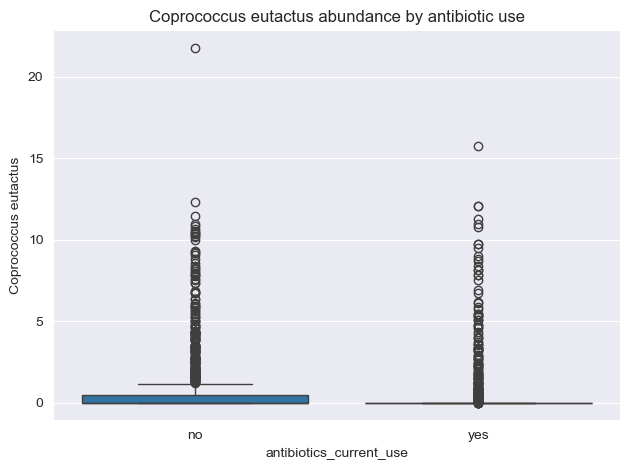

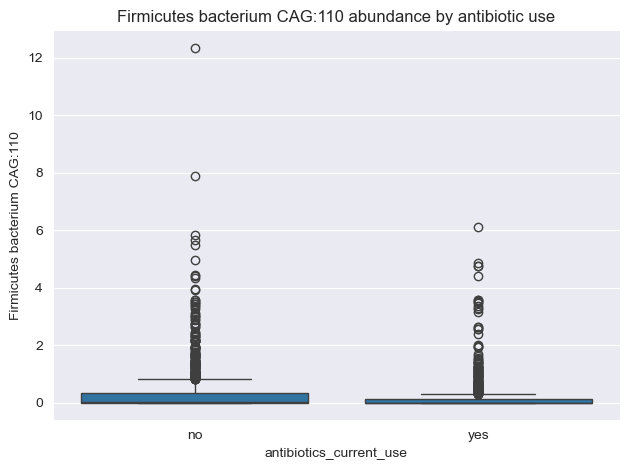

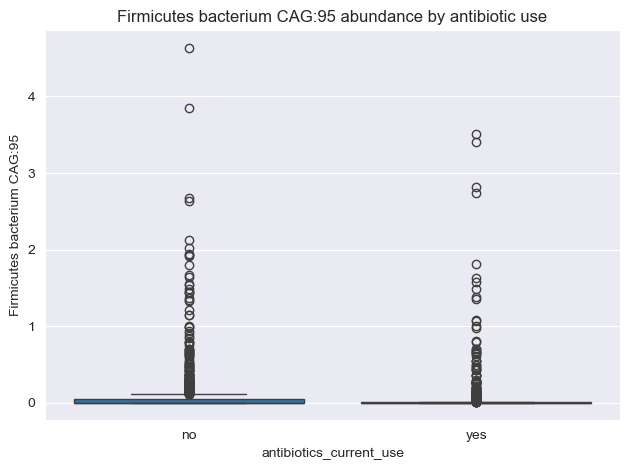

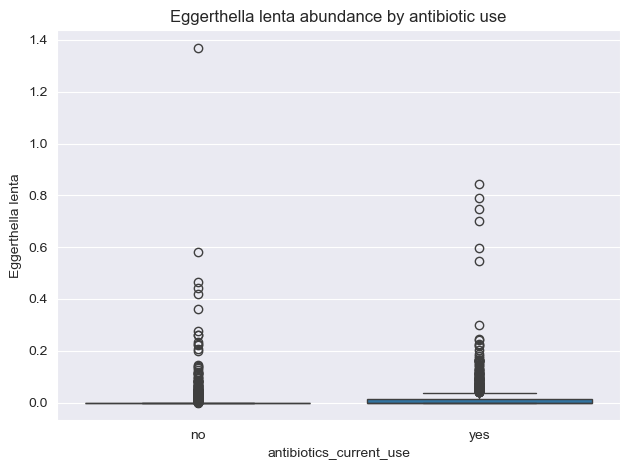

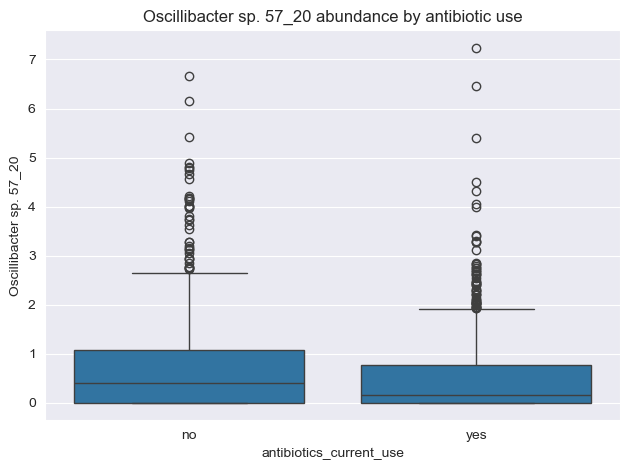

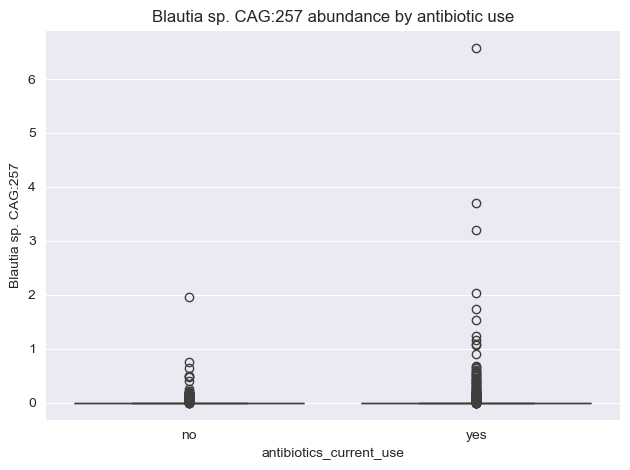

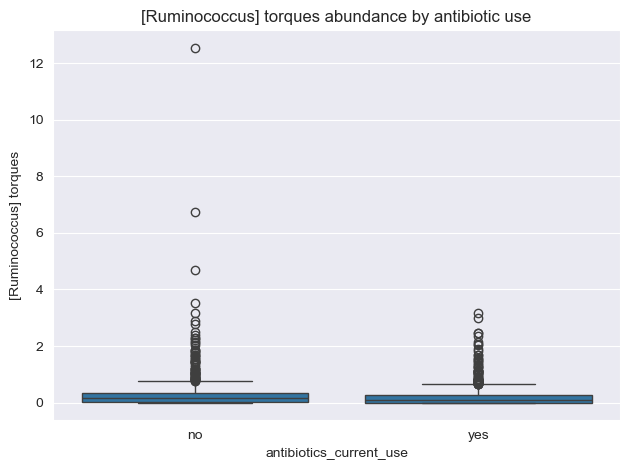

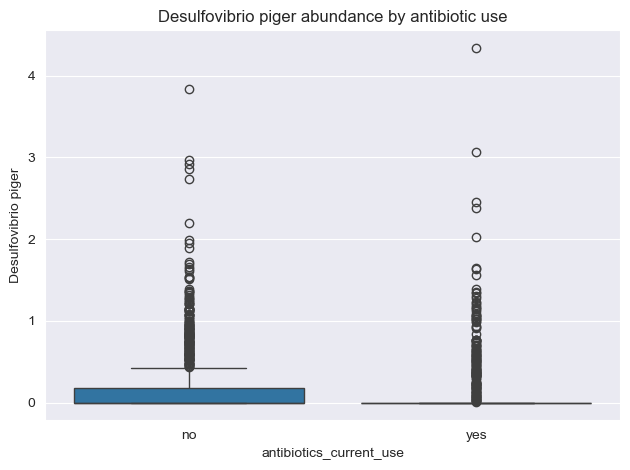

In [12]:
top_species = results_df.head(10)['species']
for sp in top_species:
    sns.boxplot(
        data=df,
        x='antibiotics_current_use',
        y=sp
    )
    plt.title(f'{sp} abundance by antibiotic use')
    plt.tight_layout()
    plt.show()

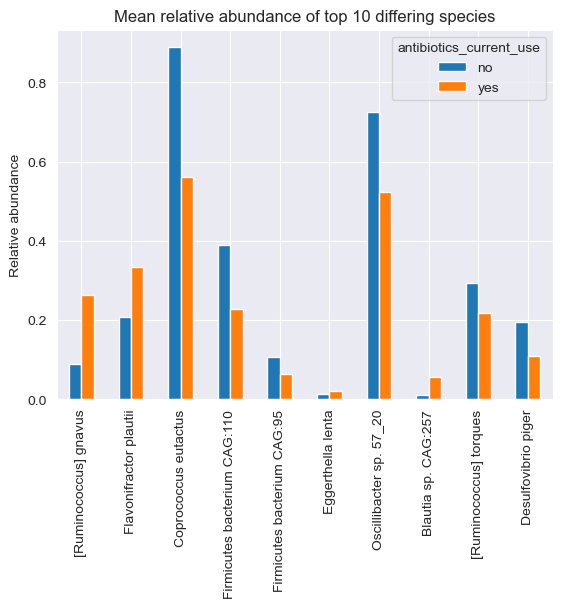

In [13]:
mean_abund = df.groupby('antibiotics_current_use')[top_species].mean().T
mean_abund.plot(kind='bar')
plt.title('Mean relative abundance of top 10 differing species')
plt.ylabel('Relative abundance')
plt.show()


In [14]:
# Select top N significant species
top_species = results_df.sort_values('p_adj').head(20)['species'].tolist()

# Subset your data for these taxa only
subset = counts_df[top_species].copy()

# Add antibiotic use label for visualization
subset['antibiotics_current_use'] = counts_df['antibiotics_current_use']

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


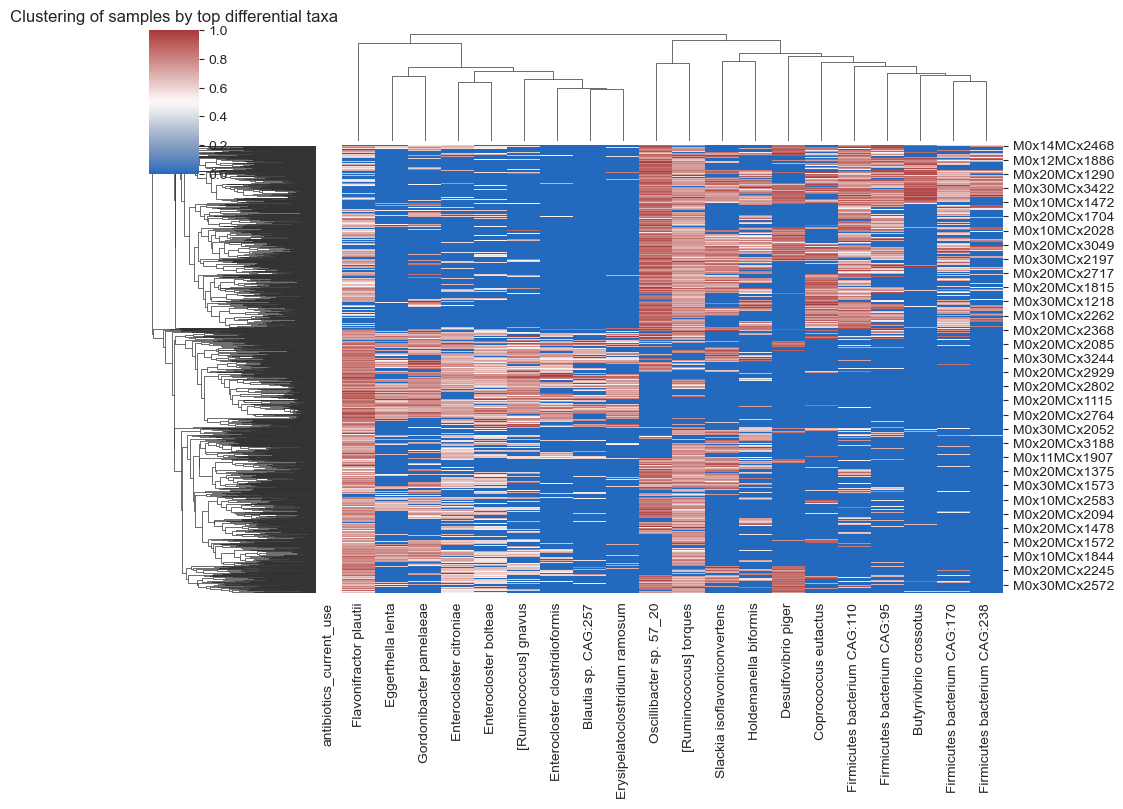

In [15]:
# Create color mapping for antibiotic use
row_colors = subset['antibiotics_current_use'].map({
    'Yes': 'tomato',
    'No': 'skyblue'
})

# Drop the label column for clustering
X = subset.drop(columns=['antibiotics_current_use'])
X_log = np.log10(X + 1e-6)
# Plot clustered heatmap
sns.clustermap(
    X_log,
    method='average',
    metric='euclidean',
    row_colors=row_colors,
    cmap='vlag',
    figsize=(10, 8),
    standard_scale=1
)
plt.title('Clustering of samples by top differential taxa')
plt.show()

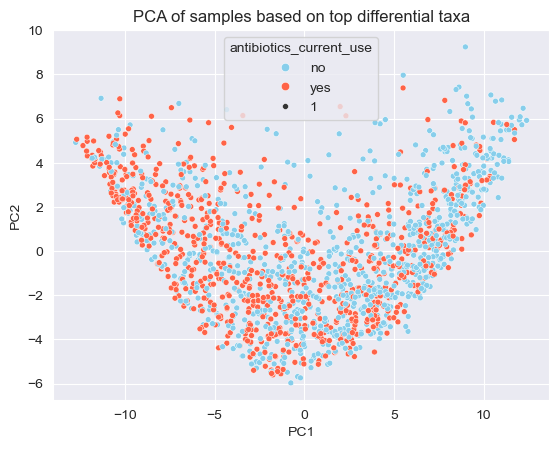

In [16]:
X_scaled = X_log - X_log.mean()  # Centering
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pcs, columns=['PC1', 'PC2'], index=X_scaled.index)
pca_df['antibiotics_current_use'] = subset['antibiotics_current_use']

sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='antibiotics_current_use',
    palette={'yes': 'tomato', 'no': 'skyblue'},
    size=1
)
plt.title('PCA of samples based on top differential taxa')
plt.show()


## Kruskal–Wallis test for differences by study condition

In [17]:
# Drop rows missing study_condition
df_cond = counts_df.dropna(subset=['study_condition']).copy()
print(df_cond.shape)


(1831, 722)


In [18]:
results_condition = []

for sp in abundance_clean.columns:
    # Group values by each condition
    groups = [df_cond[df_cond['study_condition'] == cond][sp]
              for cond in df_cond['study_condition'].unique()]

    # Skip if all zeros
    if all(g.sum() == 0 for g in groups):
        continue

    stat, pval = kruskal(*groups)
    results_condition.append({'species': sp, 'p_value': pval})

In [19]:
results_condition = pd.DataFrame(results_condition)
results_condition['p_adj'] = results_condition['p_value'] * len(results_condition) / (np.arange(1, len(results_condition)+1))
results_condition['p_adj'] = results_condition['p_adj'].clip(upper=1)
results_condition = results_condition.sort_values('p_adj')

results_condition


,species,p_value,p_adj
43,Escherichia coli,8.586275e-53,1.360144e-51
142,Enterocloster clostridioformis,1.473670e-17,7.182852e-17
168,Intestinibacter bartlettii,4.979796e-17,2.053798e-16
66,Clostridium sp. CAG:167,2.653612e-17,2.760548e-16
225,Coprococcus eutactus,5.840627e-15,1.801291e-14
...,...,...,...
357,Prevotella salivae,5.989843e-01,1.000000e+00
356,Streptococcus sp. F0442,8.021805e-01,1.000000e+00
355,Lachnospiraceae bacterium oral taxon 096,6.030029e-01,1.000000e+00
368,Oribacterium parvum,8.113457e-01,1.000000e+00


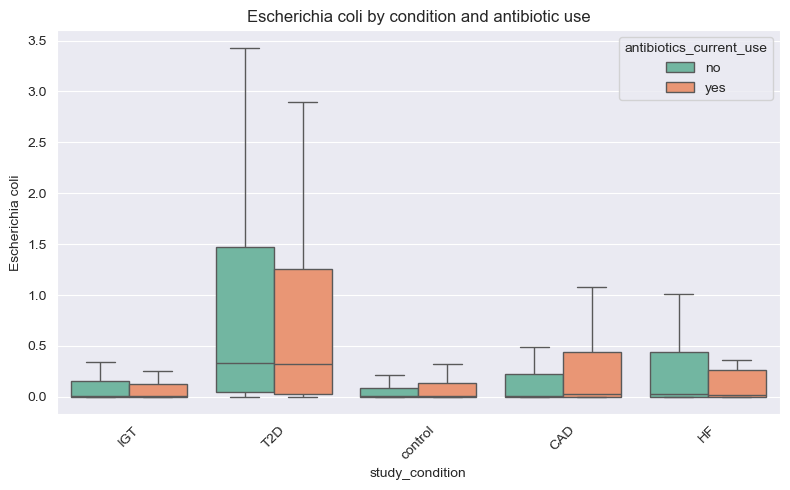

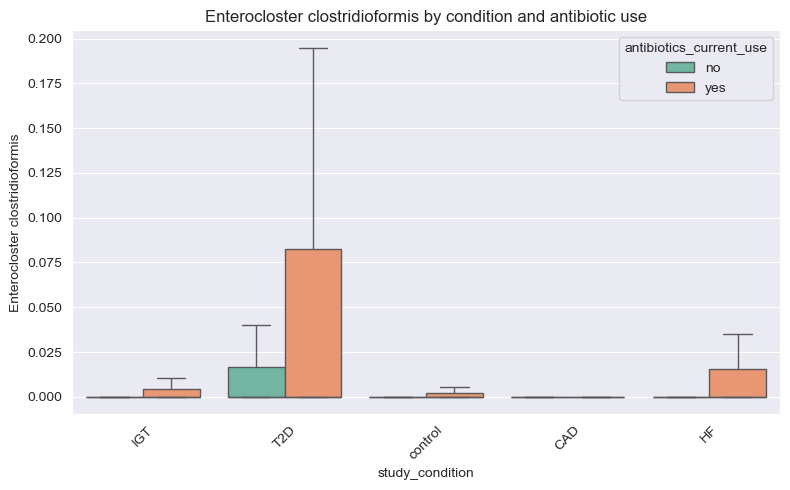

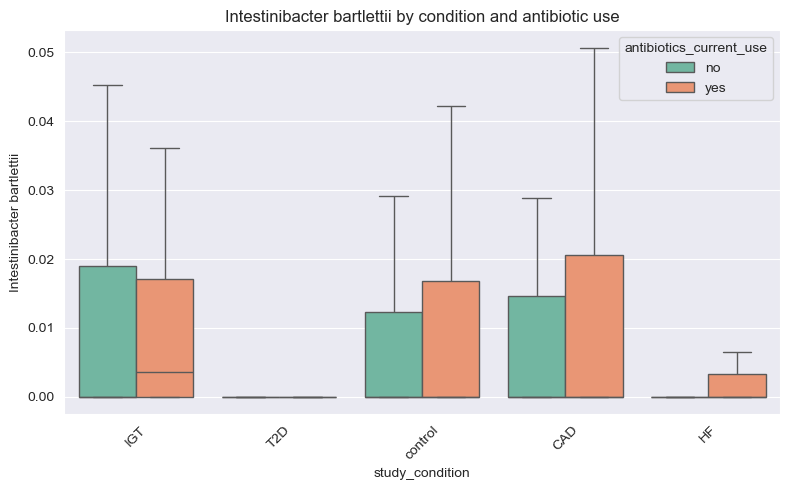

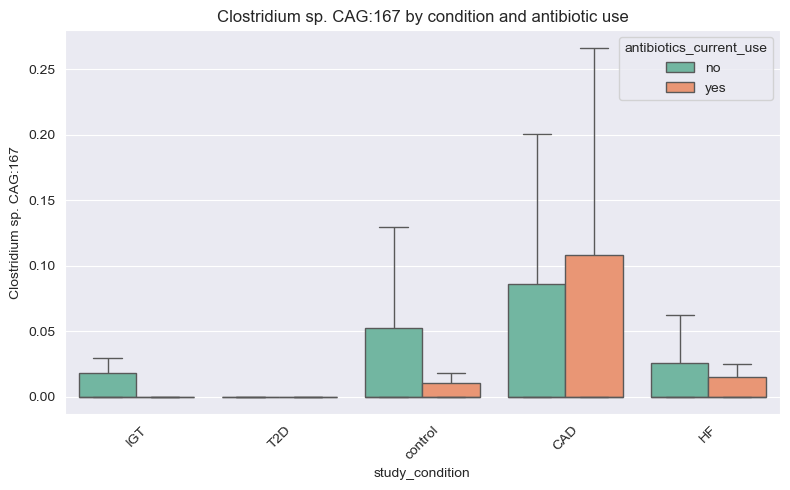

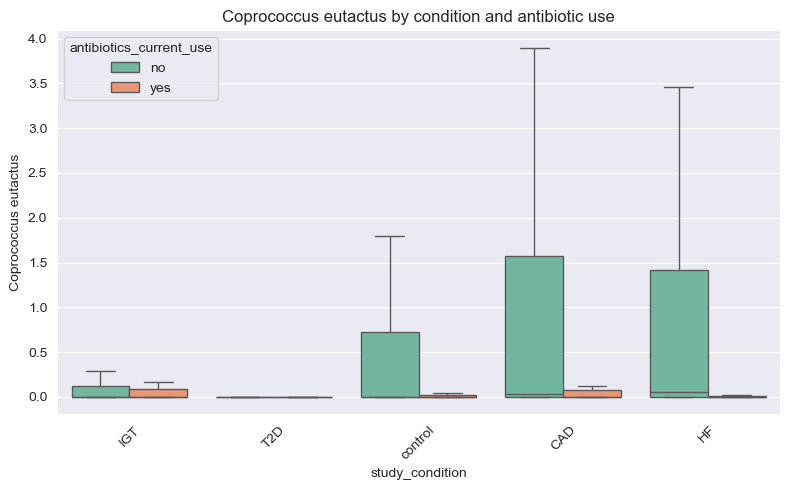

In [20]:
top_species = results_condition.head(5)['species']

for sp in top_species:
    plt.figure(figsize=(8,5))
    sns.boxplot(
        data=counts_df,
        x='study_condition',
        y=sp,
        hue='antibiotics_current_use',
        palette='Set2',
        showfliers=False
    )
    plt.title(f'{sp} by condition and antibiotic use')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Only Disease and Healthy

In [21]:
# Add new column "health_status"
counts_df['health_status'] = counts_df['study_condition'].apply(
    lambda x: 'Healthy' if x.lower() == 'control' else 'Disease'
)

# Check distribution
counts_df['health_status'].value_counts()


health_status
Disease    1189
Healthy     642
Name: count, dtype: int64

In [22]:
# Drop rows missing study_condition
df_cond = counts_df.dropna(subset=['study_condition']).copy()
print(df_cond.shape)


(1831, 723)


In [23]:
results_condition = []

for sp in abundance_clean.columns:
    # Group values by each condition
    groups = [df_cond[df_cond['study_condition'] == cond][sp]
              for cond in df_cond['study_condition'].unique()]

    # Skip if all zeros
    if all(g.sum() == 0 for g in groups):
        continue

    stat, pval = kruskal(*groups)
    results_condition.append({'species': sp, 'p_value': pval})

In [24]:
results_condition = pd.DataFrame(results_condition)
results_condition['p_adj'] = results_condition['p_value'] * len(results_condition) / (np.arange(1, len(results_condition)+1))
results_condition['p_adj'] = results_condition['p_adj'].clip(upper=1)
results_condition = results_condition.sort_values('p_adj')

results_condition


,species,p_value,p_adj
43,Escherichia coli,8.586275e-53,1.360144e-51
142,Enterocloster clostridioformis,1.473670e-17,7.182852e-17
168,Intestinibacter bartlettii,4.979796e-17,2.053798e-16
66,Clostridium sp. CAG:167,2.653612e-17,2.760548e-16
225,Coprococcus eutactus,5.840627e-15,1.801291e-14
...,...,...,...
357,Prevotella salivae,5.989843e-01,1.000000e+00
356,Streptococcus sp. F0442,8.021805e-01,1.000000e+00
355,Lachnospiraceae bacterium oral taxon 096,6.030029e-01,1.000000e+00
368,Oribacterium parvum,8.113457e-01,1.000000e+00


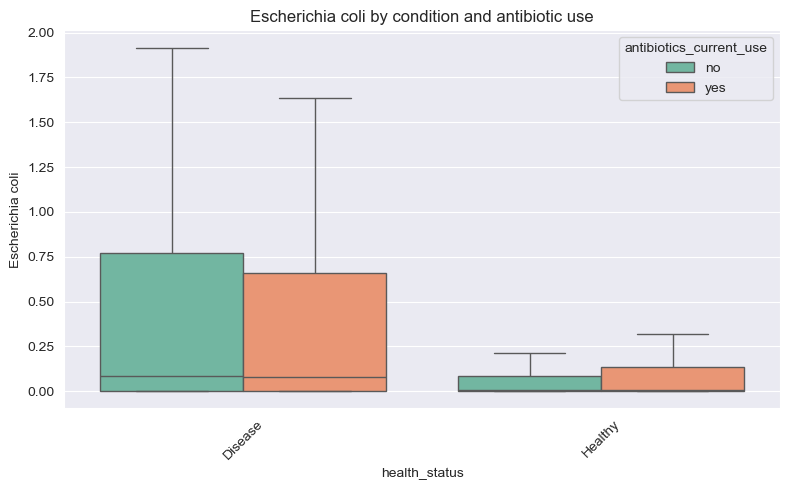

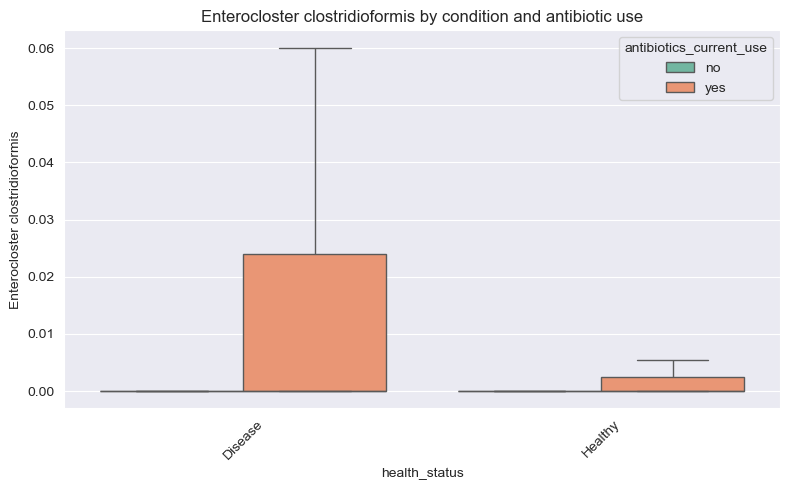

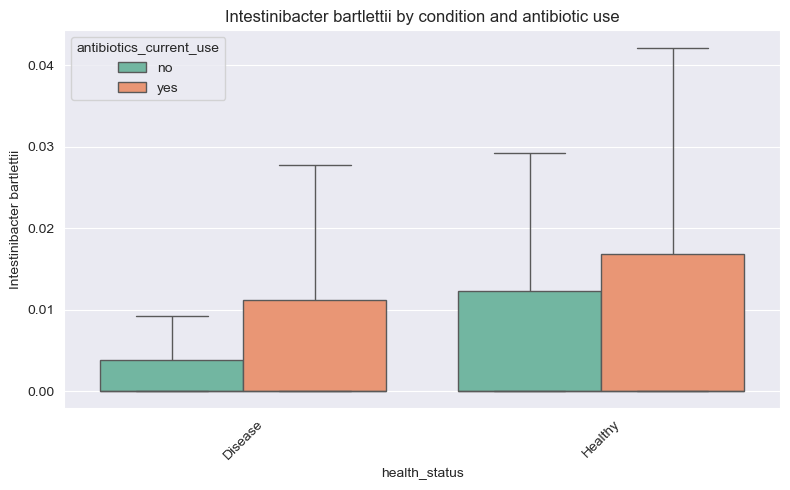

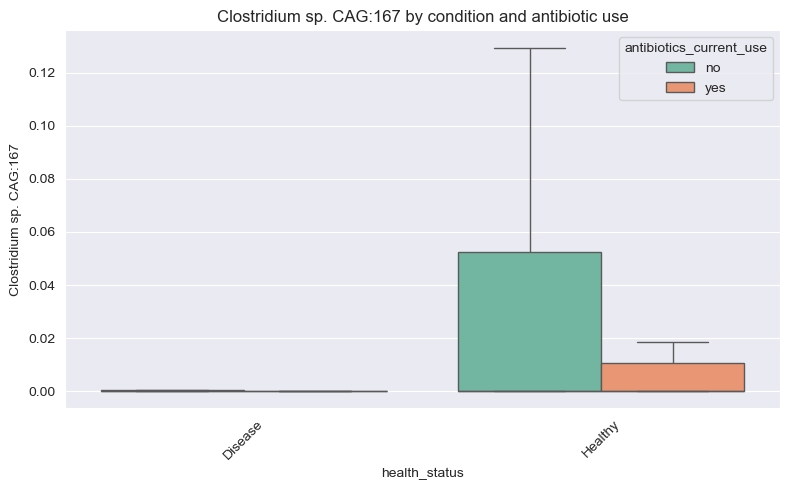

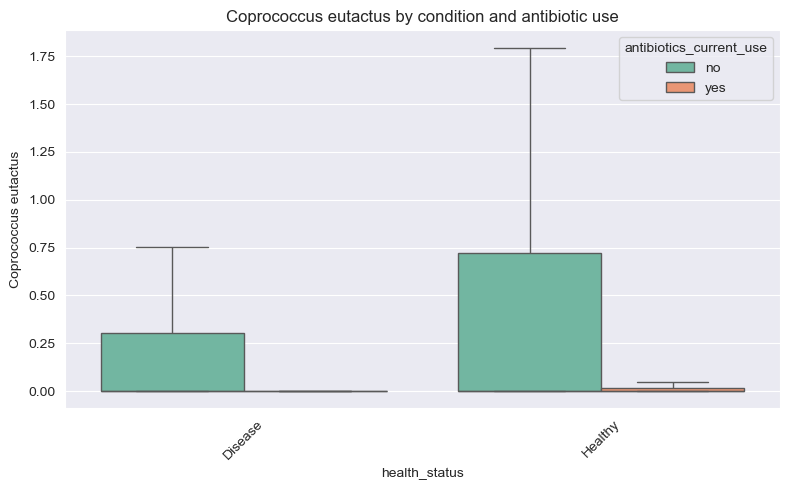

In [25]:
top_species = results_condition.head(5)['species']

for sp in top_species:
    plt.figure(figsize=(8,5))
    sns.boxplot(
        data=counts_df,
        x='health_status',
        y=sp,
        hue='antibiotics_current_use',
        palette='Set2',
        showfliers=False
    )
    plt.title(f'{sp} by condition and antibiotic use')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Sort by Conditions and then check microbes

In [26]:
# Drop samples missing key info
df = counts_df.dropna(subset=['antibiotics_current_use', 'study_condition']).copy()

# Store all results
all_results = []

for condition in df['study_condition'].unique():
    subset = df[df['study_condition'] == condition]
    print(f"\nAnalyzing condition: {condition} (n={len(subset)})")

    groups = subset['antibiotics_current_use'].unique()
    g1, g2 = groups

    # Loop over each species and run Mann–Whitney U test
    for species in abundance_clean.columns:
        vals1 = subset[subset['antibiotics_current_use'] == g1][species]
        vals2 = subset[subset['antibiotics_current_use'] == g2][species]

        # Skip if both groups have no data
        if vals1.sum() == 0 and vals2.sum() == 0:
            continue

        stat, pval = mannwhitneyu(vals1, vals2, alternative='two-sided')

        # Compute effect size (r)
        n1, n2 = len(vals1), len(vals2)
        z = (stat - (n1 * n2 / 2)) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        effect_size = abs(z) / np.sqrt(n1 + n2)

        all_results.append({
            'condition': condition,
            'species': species,
            'p_value': pval,
            'effect_size': effect_size
        })

# Convert to DataFrame
results_conditionwise = pd.DataFrame(all_results)

# Apply Benjamini–Hochberg correction within each condition
results_conditionwise = results_conditionwise.sort_values(['condition', 'p_value'])
results_conditionwise['rank'] = results_conditionwise.groupby('condition')['p_value'].rank(method='first')
results_conditionwise['p_adj'] = results_conditionwise['p_value'] * \
    results_conditionwise.groupby('condition')['p_value'].transform('count') / results_conditionwise['rank']
results_conditionwise['p_adj'] = results_conditionwise['p_adj'].clip(upper=1)

# Get top 10 significant microbes for each condition
top10_by_condition = (
    results_conditionwise
    .sort_values(['condition', 'p_adj'])
    .groupby('condition')
    .head(10)
)

top10_by_condition



Analyzing condition: IGT (n=251)

Analyzing condition: T2D (n=515)

Analyzing condition: CAD (n=252)

Analyzing condition: control (n=616)

Analyzing condition: HF (n=93)


,condition,species,p_value,effect_size,rank,p_adj
1057,CAD,Bacteroides uniformis,1.064582e-03,0.206224,3.0,1.703331e-01
1145,CAD,Bifidobacterium adolescentis,1.003612e-03,0.204060,2.0,2.408670e-01
1126,CAD,Enterocloster lavalensis,5.448301e-04,0.173705,1.0,2.615185e-01
1279,CAD,Coprococcus eutactus,2.256841e-03,0.177748,4.0,2.708209e-01
1335,CAD,Sanguibacteroides justesenii,7.070099e-03,0.112310,9.0,3.770720e-01
1303,CAD,Fusobacterium sp. CAG:439,6.942167e-03,0.054731,8.0,4.165300e-01
1204,CAD,Firmicutes bacterium CAG:424,6.554578e-03,0.037133,7.0,4.494568e-01
1309,CAD,Catenibacterium mitsuokai,1.068659e-02,0.126377,11.0,4.663239e-01
1147,CAD,Prevotella sp. CAG:279,1.446806e-02,0.103824,14.0,4.960479e-01
1096,CAD,Coprococcus comes,1.556221e-02,0.152347,15.0,4.979909e-01



Top species in CAD:
['Bacteroides uniformis', 'Bifidobacterium adolescentis', 'Enterocloster lavalensis', 'Coprococcus eutactus', 'Sanguibacteroides justesenii', 'Fusobacterium sp. CAG:439', 'Firmicutes bacterium CAG:424', 'Catenibacterium mitsuokai', 'Prevotella sp. CAG:279', 'Coprococcus comes']


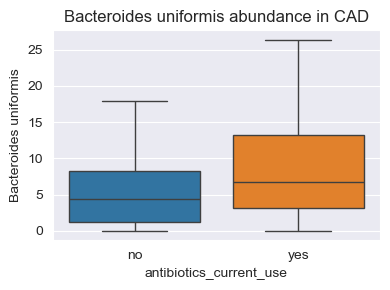

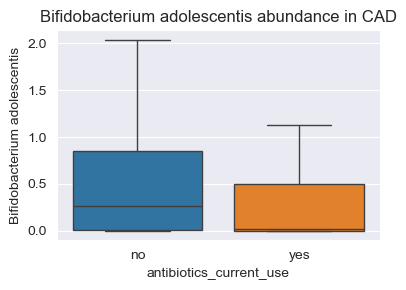

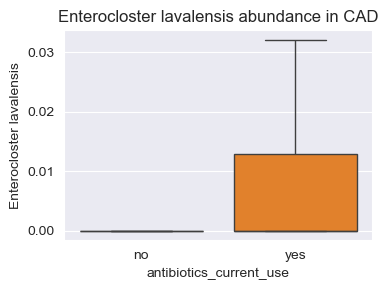

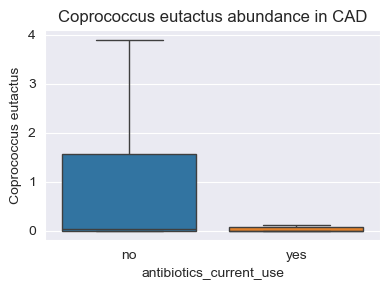

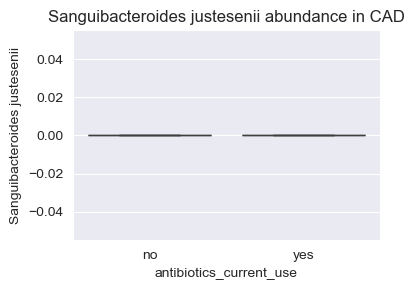

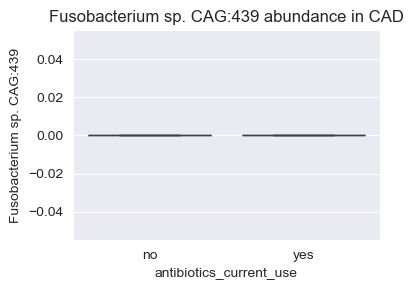

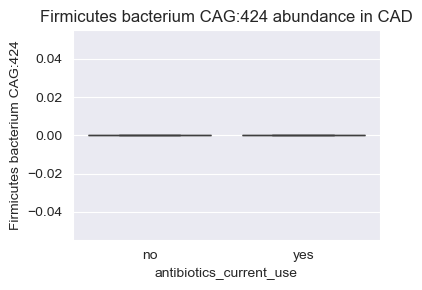

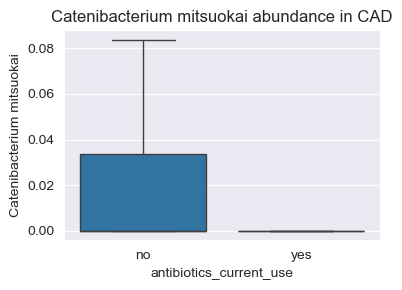

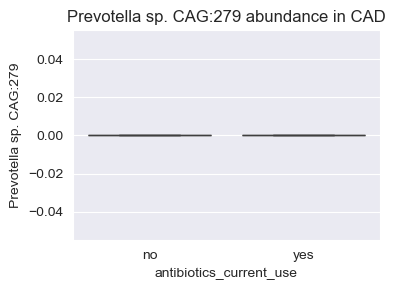

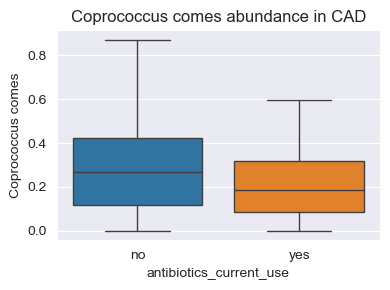


Top species in HF:
['Gordonibacter pamelaeae', 'Slackia isoflavoniconvertens', 'Phocaeicola plebeius', 'Firmicutes bacterium CAG:145', 'Adlercreutzia equolifaciens', 'Holdemanella biformis', 'Mitsuokella multacida', 'Coprococcus eutactus', 'Eggerthella lenta', 'Mitsuokella jalaludinii']


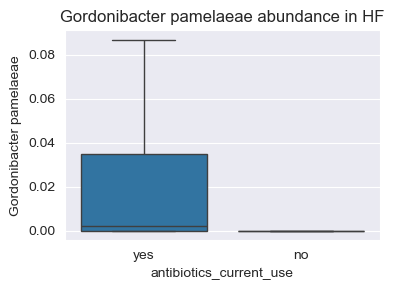

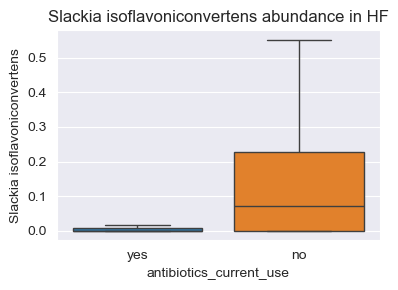

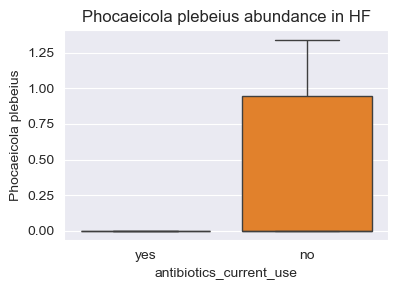

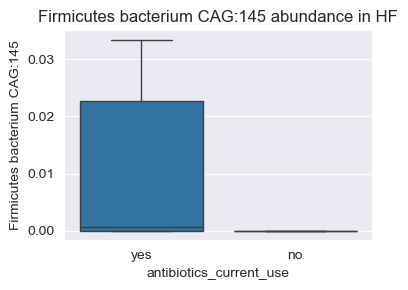

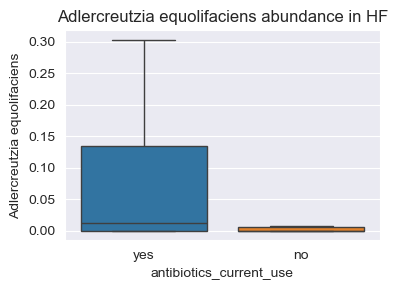

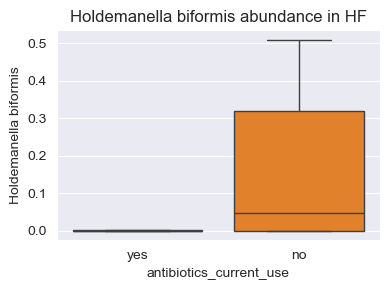

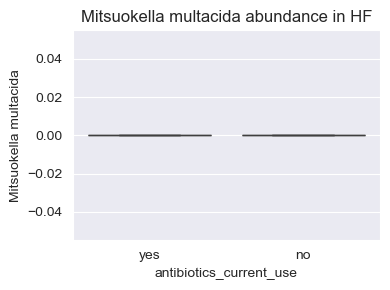

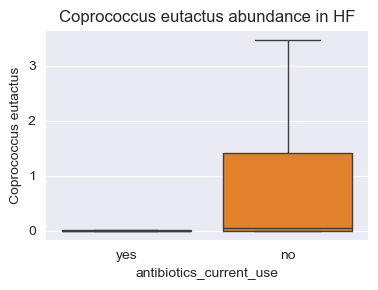

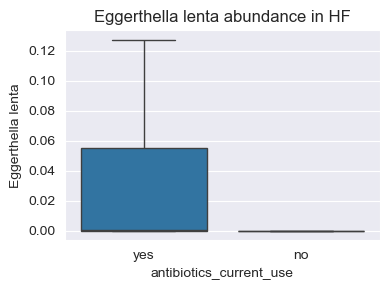

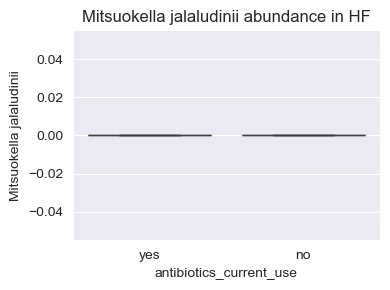


Top species in IGT:
['Flavonifractor plautii', 'Roseburia sp. CAG:182', 'Coprobacter secundus', 'Bifidobacterium pseudocatenulatum', 'Clostridium paraputrificum', 'Actinomyces sp. oral taxon 181', 'Granulicatella adiacens', 'Bacteroides eggerthii', 'Phocaeicola coprophilus', 'Turicibacter sanguinis']


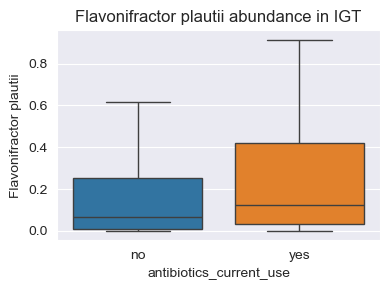

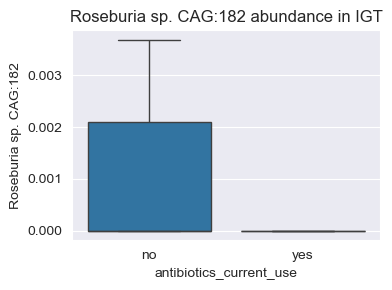

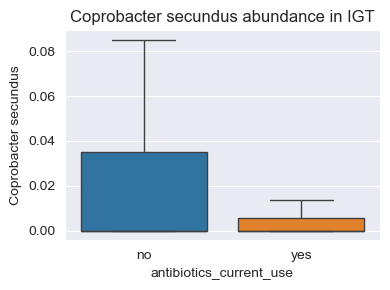

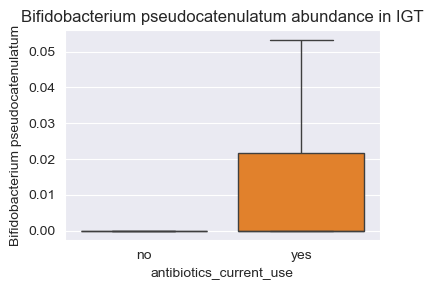

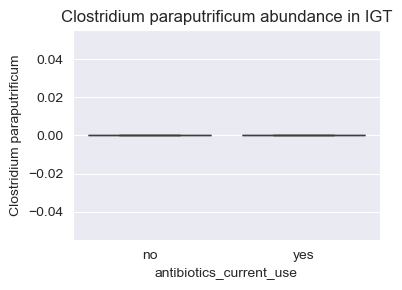

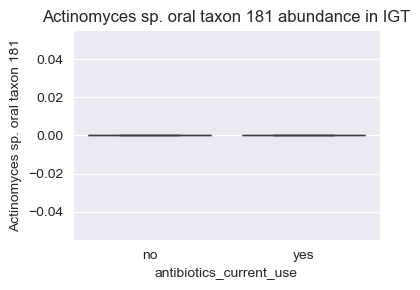

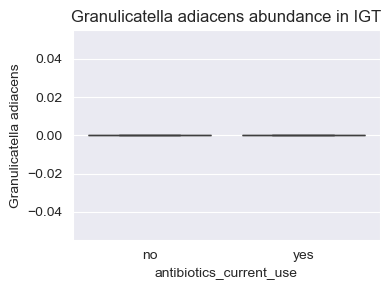

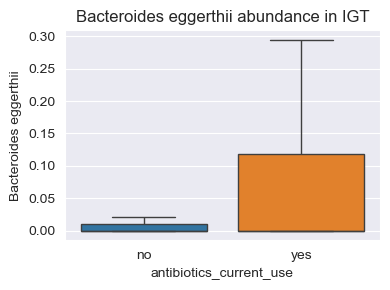

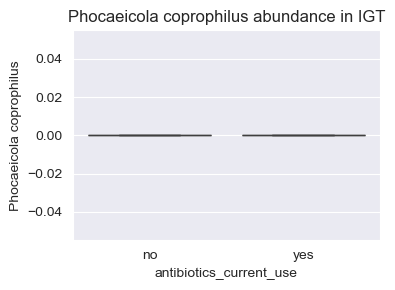

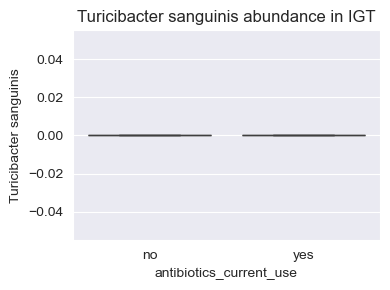


Top species in T2D:
['[Ruminococcus] gnavus', '[Ruminococcus] torques', 'Oscillibacter sp. 57_20', 'Desulfovibrio piger', 'Gordonibacter pamelaeae', 'Prevotella copri', 'Firmicutes bacterium CAG:95', 'Bacteroides uniformis', 'Blautia sp. CAG:257', 'Blautia coccoides']


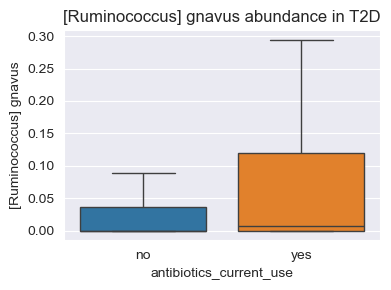

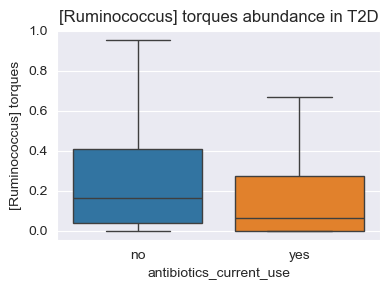

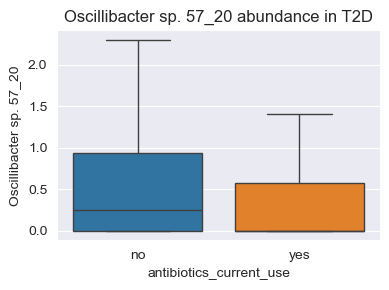

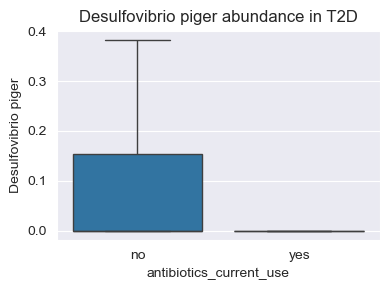

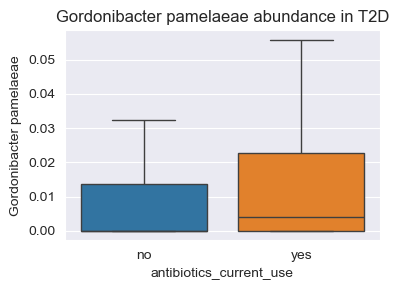

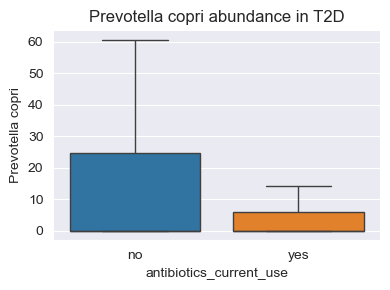

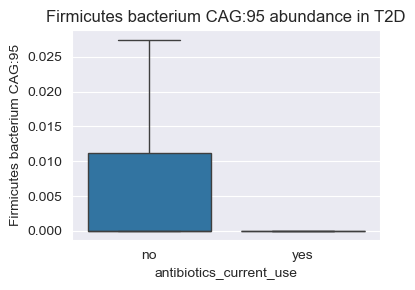

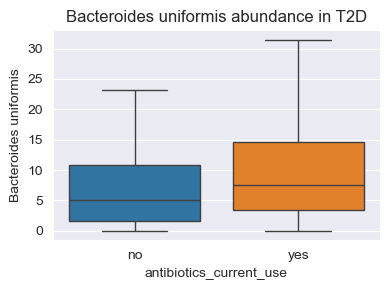

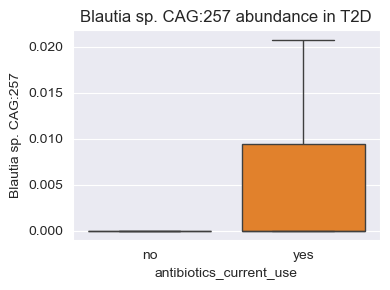

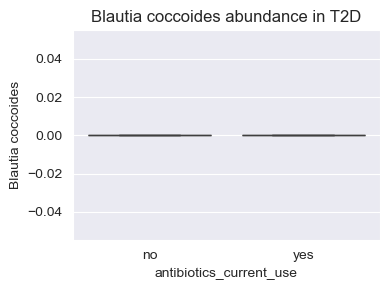


Top species in control:
['Firmicutes bacterium CAG:110', 'Enterocloster bolteae', 'Flavonifractor plautii', 'Coprococcus eutactus', 'Alistipes shahii', 'Firmicutes bacterium CAG:95', 'Firmicutes bacterium CAG:170', 'Eggerthella lenta', 'Alistipes putredinis', 'Oscillibacter sp. 57_20']


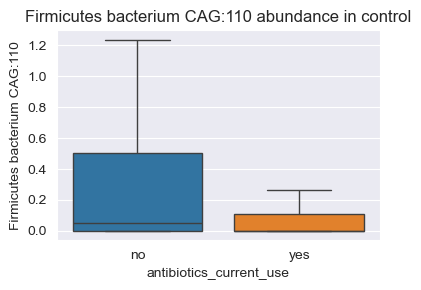

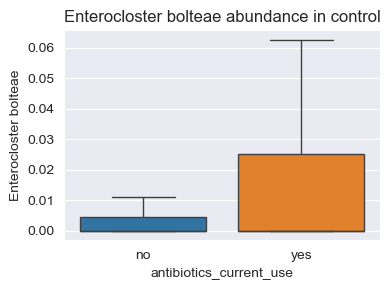

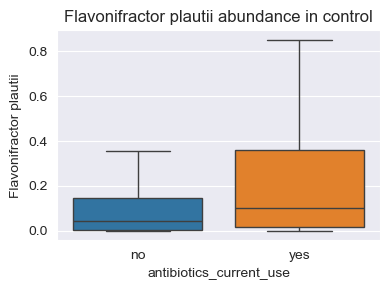

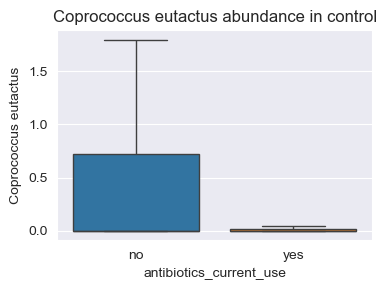

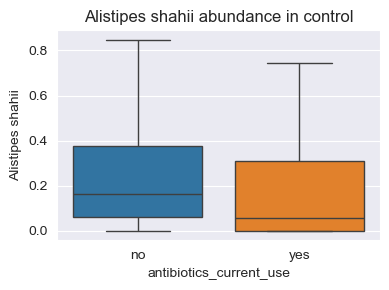

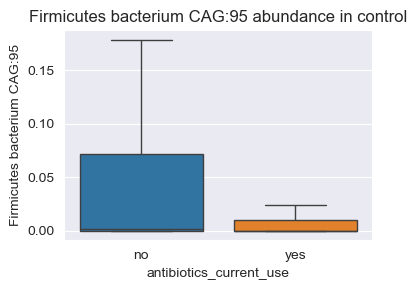

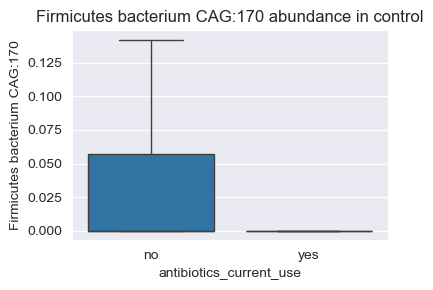

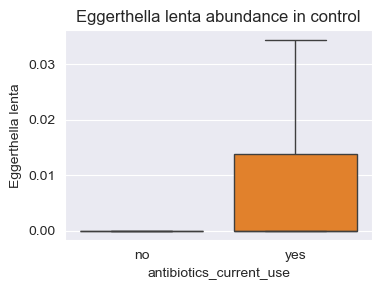

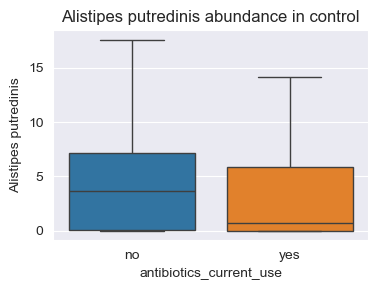

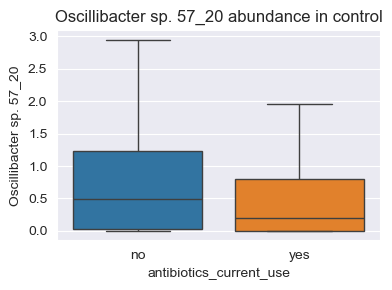

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for condition in top10_by_condition['condition'].unique():
    top_species = top10_by_condition[top10_by_condition['condition'] == condition]['species']
    print(f"\nTop species in {condition}:")
    print(list(top_species))

    for sp in top_species:
        plt.figure(figsize=(4,3))
        sns.boxplot(
            data=df[df['study_condition'] == condition],
            x='antibiotics_current_use',
            y=sp,
            showfliers=False,
            hue='antibiotics_current_use',
            legend=False
        )
        plt.title(f'{sp} abundance in {condition}')
        plt.tight_layout()
        plt.show()


## Clustering the patients based on the differentially expressed microbes

In [28]:
top_species = results_condition.head(10)['species']
X = abundance_clean[top_species]


In [29]:
X_scaled = StandardScaler().fit_transform(X)


In [30]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df_cond['cluster'] = labels

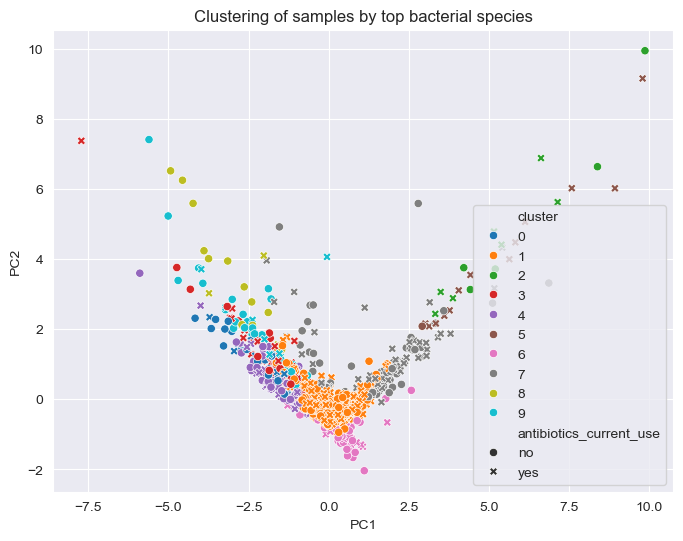

In [40]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cond['PC1'], df_cond['PC2'] = X_pca[:,0], X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_cond,
    x='PC1', y='PC2',
    hue='cluster',
    style='antibiotics_current_use',
    palette='tab10'
)
plt.title('Clustering of samples by top bacterial species')
plt.show()

In [33]:
pd.crosstab(df_cond['cluster'], [df_cond['study_condition'], df_cond['antibiotics_current_use']])


study_condition          CAD      HF     IGT       T2D      control     
antibiotics_current_use   no yes  no yes  no  yes   no  yes      no  yes
cluster                                                                 
0                          3   2   1   1   1    0    6    1      13    8
1                        103  67  32  39  89  107  237  155     215  213
2                          1   1   0   0   0    1    3    5       1    1
3                          9   6   2   4   1    6    4    2      17   17
4                         19   8   3   1   8    5   11    5      33   18
5                          0   0   0   0   0    2    0   10       1    1
6                         11   2   2   2   3    5   16    9       3    1
7                          9   1   0   2   8   10   25   22      11   28
8                          4   0   0   0   2    1    1    0       5    2
9                          4   2   3   1   1    1    3    0      20    8

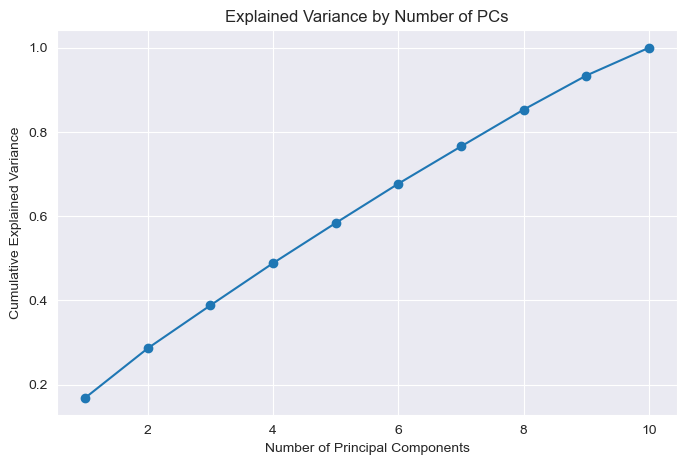

PC1: cumulative variance = 0.17
PC2: cumulative variance = 0.29
PC3: cumulative variance = 0.39
PC4: cumulative variance = 0.49
PC5: cumulative variance = 0.58
PC6: cumulative variance = 0.68
PC7: cumulative variance = 0.77
PC8: cumulative variance = 0.85
PC9: cumulative variance = 0.93
PC10: cumulative variance = 1.00


In [41]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), cum_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCs')
plt.grid(True)
plt.show()

for i, var in enumerate(cum_var[:10], 1):
    print(f"PC{i}: cumulative variance = {var:.2f}")
